In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
"""Motivation, tasks and questions
Motivation:
For the people who enjoys camping and hiking like us or people who living near the forest,
coming across with mushrooms is very usual. And we decided to investigate mushrooms in
case if we need to eat them.
Main task:
Classification of Mushrooms(edibility)
Side questions:
Can we distinguish poisonous mushrooms according to it’s appearance?
What is the proportion of poisonous mushrooms?
What is the possibility of being in public places? Can we come across with poisonous
mushrooms oftenly?
Data Source
This project is inspired by https://www.kaggle.com/uciml/mushroom-classification and
shares the same dataset"""

'Motivation, tasks and questions\nMotivation:\nFor the people who enjoys camping and hiking like us or people who living near the forest,\ncoming across with mushrooms is very usual. And we decided to investigate mushrooms in\ncase if we need to eat them.\nMain task:\nClassification of Mushrooms(edibility)\nSide questions:\nCan we distinguish poisonous mushrooms according to it’s appearance?\nWhat is the proportion of poisonous mushrooms?\nWhat is the possibility of being in public places? Can we come across with poisonous\nmushrooms oftenly?\nData Source\nThis project is inspired by https://www.kaggle.com/uciml/mushroom-classification and\nshares the same dataset'

# Data Preprocessing

In [3]:
df= pd.read_csv("C:\\Users\\sefad\\Desktop\\mushrooms.csv")

#df= pd.read_csv("C:/Users/user/Desktop/dersler/datasci/mushrooms.csv")

df.info()

result=df.head(5)


#Attribute Information: 

# classes: edible=e, poisonous=p

df["class"].replace({"e": "edible", "p": "poisonous"}, inplace=True)

#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

df["cap-shape"].replace({"b": "bell", "c": "conical","x": "convex", "f": "flat","k": "knobbed", "s": "sunken"}, inplace=True)
                                           
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
                                           
df["cap-surface"].replace({"f": "fibrous", "g": "grooves","y": "scaly", "s": "smooth"}, inplace=True)

#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

df["cap-color"].replace({"n": "brown", "b": "buff","c": "cinnamon", "g": "gray","r": "green", "p": "pink","u": "purple", "e": "red","w": "white", "y": "yellow"}, inplace=True)

#bruises: bruises=t,no=f

df["bruises"].replace({"t": "bruises", "f": "no"}, inplace=True)

#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

df["odor"].replace({"a": "almond", "l": "anise","c": "creosote", "y": "fishy","f": "foul", "m": "musty","n": "none", "p": "pungent", "s": "spicy"}, inplace=True)

#gill-attachment: attached=a,descending=d,free=f,notched=n

df["gill-attachment"].replace({"a": "attached", "d": "descending","f": "free", "n": "notched"}, inplace=True)

#gill-spacing: close=c,crowded=w,distant=d

df["gill-spacing"].replace({"c": "close", "w": "crowded","d": "distant"}, inplace=True)

#gill-size: broad=b,narrow=n

df["gill-size"].replace({"b": "broad", "n": "narrow"}, inplace=True)

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

df["gill-color"].replace({"k": "black", "b": "buff","h": "chocolate", "g": "gray", "r": "green", "o": "orange","p": "pink", "u": "purple" , "e": "red", "w": "white" ,"y": "yellow","n":"brown"}, inplace=True)

#stalk-shape: enlarging=e,tapering=t

df["stalk-shape"].replace({"e": "enlarging", "t": "tapering"}, inplace=True)

#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

df["stalk-root"].replace({"b": "bulbous", "c": "club","u": "cup", "e": "equal","z": "rhizomorphs", "t": "tapering","r": "rooted", "?": "missing"}, inplace=True)

#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

df["stalk-surface-above-ring"].replace({"f": "fibrous", "y": "scaly","k": "silky", "s": "smooth"}, inplace=True)

#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

df["stalk-surface-below-ring"].replace({"f": "fibrous", "y": "scaly","k": "silky", "s": "smooth"}, inplace=True)

#stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

df["stalk-color-above-ring"].replace({"n": "brown", "b": "buf","c": "cinnamon", "g": "gray","o": "orange", "p": "pink","e": "red", "w": "white", "y": "yellow"}, inplace=True)

#stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

df["stalk-color-below-ring"].replace({"n": "brown", "b": "buf","c": "cinnamon", "g": "gray","o": "orange", "p": "pink","e": "red", "w": "white", "y": "yellow"}, inplace=True)

#veil-type: partial=p,universal=u

df["veil-type"].replace({"p": "partial", "u": "universal"}, inplace=True)

#veil-color: brown=n,orange=o,white=w,yellow=y

df["veil-color"].replace({"n": "brown", "o": "orange", "w": "white", "y": "yellow"}, inplace=True)

#ring-number: none=n,one=o,two=t

df["ring-number"].replace({"n": "none", "o": "one", "t": "two"}, inplace=True)

#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

df["ring-type"].replace({"c": "cobwebby", "e": "evanescent", "f": "flaring","l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"}, inplace=True)

#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

df["spore-print-color"].replace({"k": "black","n": "brown", "h": "chocolate","r": "green","o": "orange", "p": "purple", "w": "white", "y": "yellow","b":"buff"}, inplace=True)

#population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

df["population"].replace({"a": "abundant", "c": "clustered","n": "numerous", "s": "scattered","v": "several", "y": "solitary"}, inplace=True)

#habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d  

df["habitat"].replace({"g": "grasses", "l": "leaves", "m": "meadows","p": "paths", "u": "urban", "w": "waste", "d": "woods"}, inplace=True)



mushrooms=df
mushrooms2=df
mushrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# Exploring Dataset

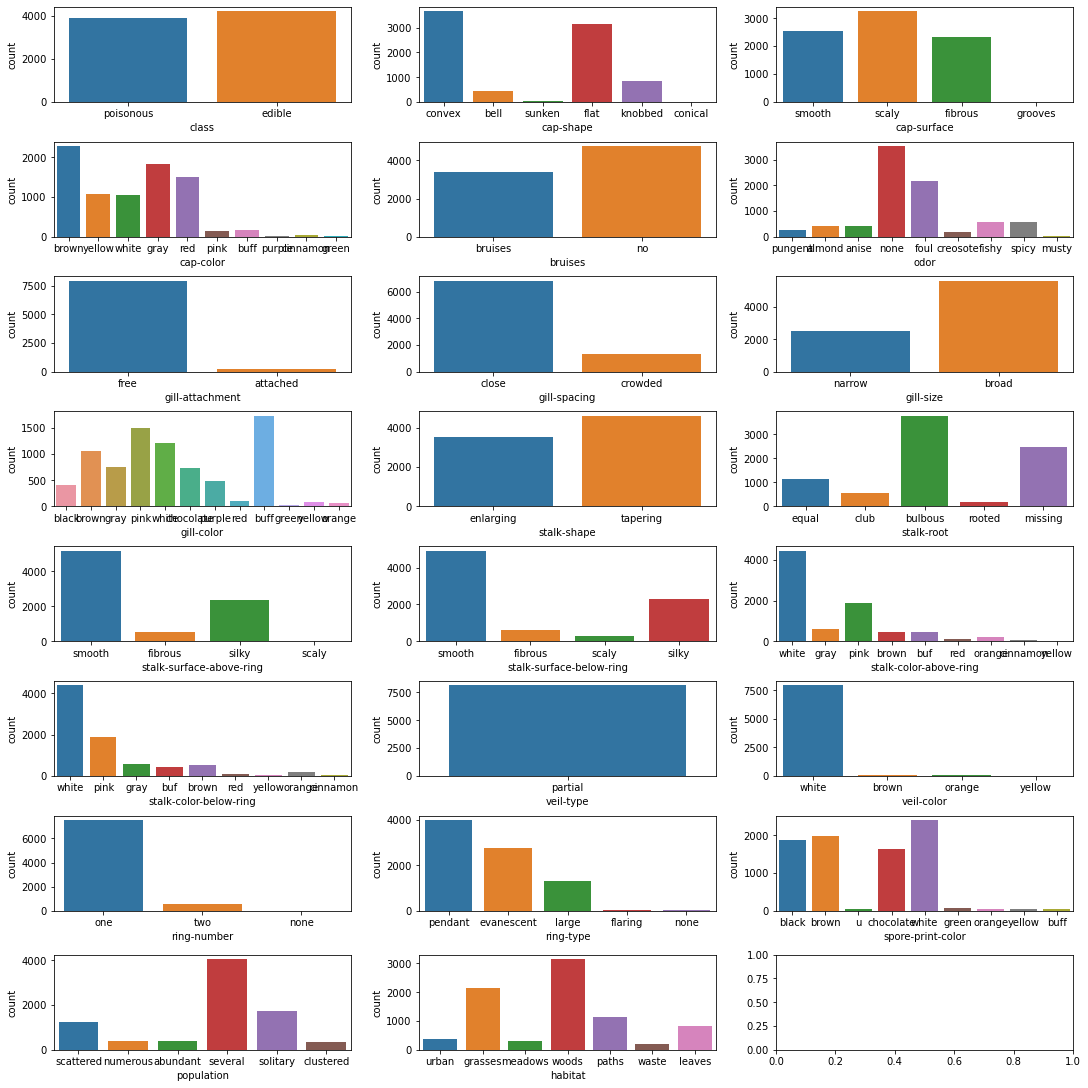

In [4]:
##Exploring Dataframe
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
def countplot(df):
    fig, axs = plt.subplots(8, 3, figsize=(15,15), constrained_layout=True)##for 23 subplot we need 8x3
    for i, f in enumerate(df.columns):
        sns.countplot(x=f, data=df, ax=axs[i//3][i%3])
    plt.show()
countplot(mushrooms)

([<matplotlib.patches.Wedge at 0x22b3ab1b220>,
 [Text(-0.062071904545809166, 1.0982472757380535, 'Edible'),
  Text(0.062071904545808784, -1.0982472757380535, 'Poisonous')],
 [Text(-0.03385740247953227, 0.5990439685843927, '51.8'),
  Text(0.03385740247953206, -0.5990439685843928, '48.2')])

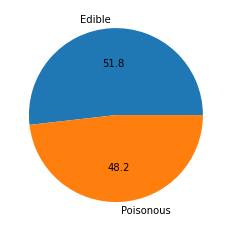

In [5]:
labels=['Edible','Poisonous']
plt.pie(mushrooms['class'].value_counts(),labels=labels,autopct='%0.1f')

In [6]:
#we have to use no labels so we are selecting the dataframes except class attribute
#mushrooms=df.iloc[:,1:] ---> for corr analysis we keep it for a while
##veil-type attribute has only 1 value,so we drop it too
mushrooms=mushrooms.drop('veil-type',axis=1)

# Clustering for k=2
## Main Task

In [7]:
#to use distance functions for k-means clustering we have to convert datas from categorical to numerical with sklearns labelencoder
le = LabelEncoder()
mushrooms=mushrooms.apply(LabelEncoder().fit_transform)
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,3,4,4,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,3,4,4,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,3,4,4,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,3,2,7,7,2,1,0,7,4,1


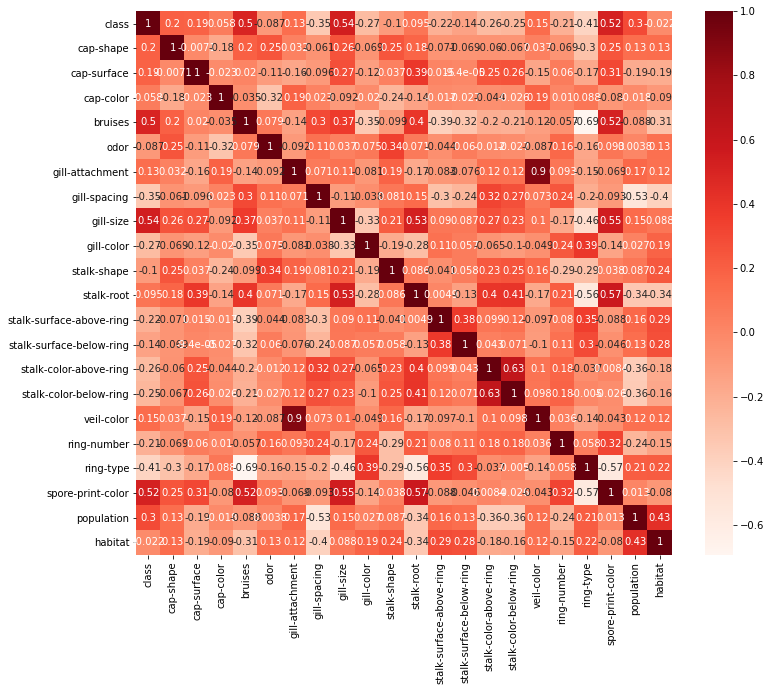

class                1.000000
bruises              0.501530
gill-size            0.540024
ring-type            0.411771
spore-print-color    0.519438
Name: class, dtype: float64
cap-shape                   0.199488
cap-surface                 0.186806
cap-color                   0.058452
odor                        0.086800
gill-attachment             0.129200
stalk-shape                 0.102019
stalk-root                  0.094766
stalk-surface-below-ring    0.139254
veil-color                  0.145142
habitat                     0.022363
Name: class, dtype: float64


In [8]:
plt.figure(figsize=(12,10))
cor = mushrooms.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
corrs = abs(cor["class"])
most_relevant_features = corrs[corrs>0.4]
print(most_relevant_features)
least_relevant_features=corrs[corrs<0.2]
print(least_relevant_features)

In [9]:
from scipy import stats

def chi_square_test(feature1, feature2):
    result = []
    result.append(feature1)

    contingency_table = pd.crosstab(mushrooms[feature1], mushrooms[feature2])
    observed_values = contingency_table.values
    chi_square_result = stats.chi2_contingency(contingency_table)
    expected_values = chi_square_result[3]

  ## calculate degree of freedom ( more the degree more chances of getting good results)

    no_rows = len(contingency_table.iloc[0:2,0])
    no_columns = len(contingency_table.iloc[0,0:2])

    degree_freedom = (no_rows-1) / (no_columns-1)
    result.append(degree_freedom)

    ## Significance level (Generally used for the test)
    alpha=0.05
  
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    result.append(chi_square_statistic)

    critical_value = stats.chi2.ppf(q = 1-alpha, df=degree_freedom)
    result.append(critical_value)

    p_value = 1 - stats.chi2.cdf(x = chi_square_statistic, df = degree_freedom)
    result.append(p_value) 

  ## Check for Null hypothesis using p_value and chi_square statistics

    if chi_square_statistic >= critical_value or p_value <= alpha:
        result.append('True')
        return result
    else:
        result.append('False')
        return result

In [10]:
corr_cat = []
print(mushrooms.columns.tolist()[0])
for i in mushrooms.columns.tolist():
    corr_cat.append(chi_square_test(i,'class'))

cat_corr = pd.DataFrame(corr_cat, columns=['Feature' , 'DOF', 'Chi_Sq-Stats', 'critical_val', 'p_value', 'Correlated'])
cat_corr

class


,Feature,DOF,Chi_Sq-Stats,critical_val,p_value,Correlated
0,class,1.0,8124.000000,3.841459,0.0,True
1,cap-shape,1.0,489.919954,3.841459,0.0,True
2,cap-surface,1.0,315.042831,3.841459,0.0,True
3,cap-color,1.0,387.597769,3.841459,0.0,True
4,bruises,1.0,2043.451813,3.841459,0.0,True
5,odor,1.0,7659.726740,3.841459,0.0,True
6,gill-attachment,1.0,135.610714,3.841459,0.0,True
7,gill-spacing,1.0,986.037112,3.841459,0.0,True
8,gill-size,1.0,2369.172115,3.841459,0.0,True
9,gill-color,1.0,3765.714086,3.841459,0.0,True


[[0.62795699 2.54107527 1.90064516 4.46322581 0.74623656 4.62365591
  0.9827957  0.15784946 0.43311828 2.08344086 0.61591398 1.69978495
  2.40129032 2.36602151 5.46193548 5.46193548 1.97419355 1.03010753
  1.63870968 3.70193548 3.6255914  2.75956989]
 [0.28670121 2.42602188 1.53195164 4.13644214 0.36787565 5.00863558
  0.96257916 0.16637881 0.1433506  8.27115717 0.50201497 0.89234312
  2.62809442 2.50374208 5.42602188 5.30166955 1.95394358 1.12204951
  3.16637881 2.20552677 3.66868164 3.83880253]]
2


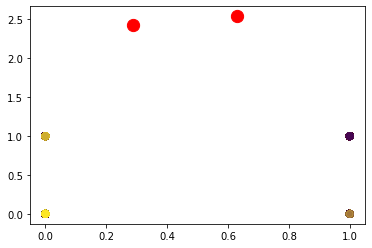

0.4382077794190054


In [11]:
##with Label Encoder and k ==2
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=2,random_state=0).fit(mushrooms)
centroids = kmeans.cluster_centers_
print(centroids)
print(len(centroids))
plt.scatter(mushrooms['class'], mushrooms['bruises'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150)
plt.show()
y_kmeans = kmeans.fit_predict(mushrooms.drop('class',axis=1))
print(accuracy_score(mushrooms['class'],y_kmeans))


In [12]:
ds=mushrooms.drop('class',axis=1).drop('cap-shape',axis=1).drop('cap-surface',axis=1).drop('cap-color',axis=1).drop('odor',axis=1).drop('gill-attachment',axis=1).drop('gill-color',axis=1).drop('stalk-shape',axis=1).drop('stalk-surface-above-ring',axis=1).drop('stalk-root',axis=1).drop('stalk-surface-below-ring',axis=1).drop('stalk-color-below-ring',axis=1).drop('veil-color',axis=1)
y_kmeans2 = kmeans.fit_predict(mushrooms.drop('class',axis=1))
print(accuracy_score(mushrooms['class'],y_kmeans2))

0.4382077794190054


In [13]:
mushrooms_ohe = pd.get_dummies(mushrooms2.iloc[:,1:], 
                               columns=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
                                    'stalk-shape','stalk-root','stalk-surface-above-ring',"stalk-surface-below-ring",'stalk-color-above-ring',
                                    'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
#mushrooms2
mushrooms_ohe
model = KMeans(n_clusters=2)
model.fit(mushrooms_ohe)
predict = model.predict(mushrooms_ohe)
print(accuracy_score(mushrooms['class'],predict))

0.8921713441654358


In [14]:
##the results of one hot encoding with get_dummies approach is better than label encoding
##now we will get the results and fill the test ds with these values
#1 value represents poisonous,0 represents edible
ict=0#pois
inct=0#edib
#dib\n",ict,"pois")
clustered_df=df.drop('class',axis=1)
#mushrooms
clustered_df['class']=predict
clustered_df['class']=clustered_df['class'].replace({0: "edible",1 : "poisonous"})
clustered_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,edible
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,edible
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


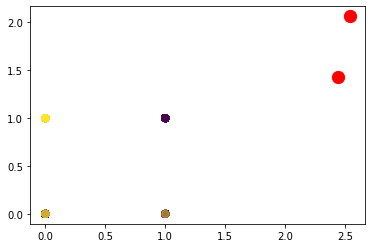

In [15]:
centroids = kmeans.cluster_centers_
plt.scatter(mushrooms['class'], predict, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150)
plt.show()

              precision    recall  f1-score   support

      edible       0.84      0.99      0.90      4208
   poisonous       0.98      0.79      0.88      3916

    accuracy                           0.89      8124
   macro avg       0.91      0.89      0.89      8124
weighted avg       0.91      0.89      0.89      8124



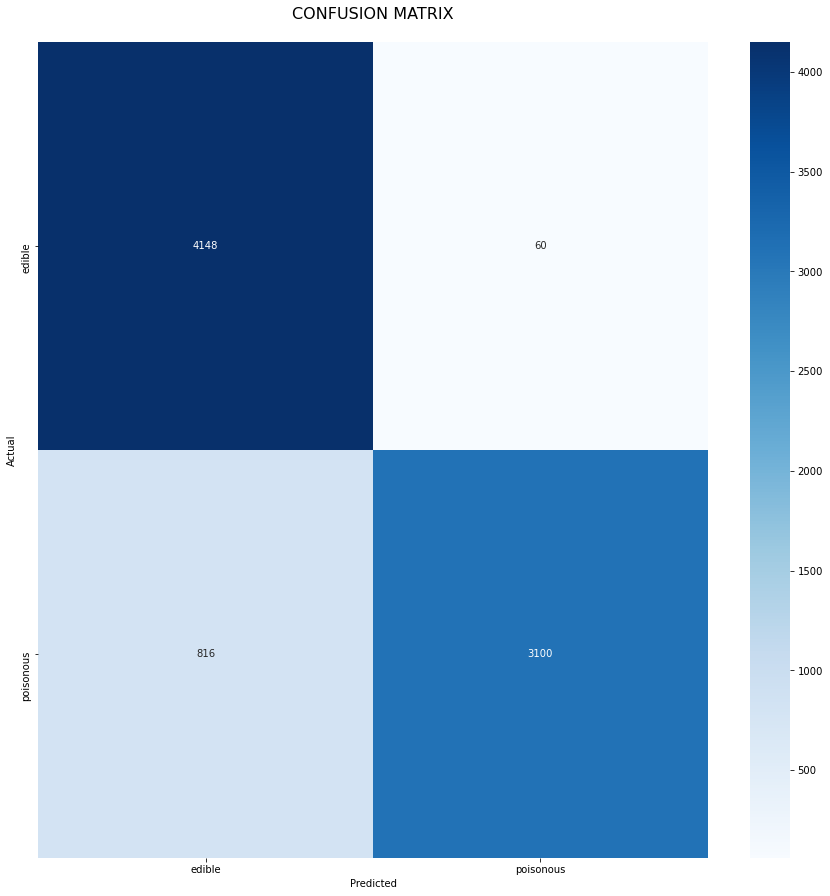

In [16]:
print(classification_report(mushrooms['class'],predict,target_names=[ 'edible', 'poisonous']))
conf_mat = confusion_matrix(mushrooms['class'],predict)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels={ 'edible', 'poisonous'},
            yticklabels={ 'edible', 'poisonous'})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX\n", size=16);


# Side Question-1
## What is the proportion of poisonous mushrooms?

poisonous proportion = 0.3889709502708026 edible proportion  0.6110290497291975


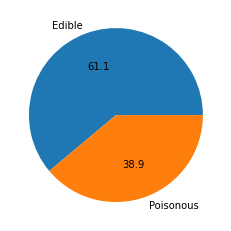

In [17]:
##we kept our results at a new dataframe called clustered_df
##now to find proportion of poisonous mushrooms due to our results, we can handly it basicly by only plotting a pie chart represents class values.
labels=['Edible','Poisonous']
plt.pie(clustered_df['class'].value_counts(),labels=labels,autopct='%0.1f')
##other than visualizing it we can define a function that finds that proportion aswell.
def get_proportion(df):
    data=df
    pc=0
    ec=0
    for d in range(len(data)):
        if(data.iloc[d]=='edible'):
            ec+=1
        else:
            pc+=1
        
    return print("poisonous proportion =",pc/len(data),"edible proportion ",ec/len(data));

get_proportion(clustered_df['class'])


# Side Question -II
## Can we distinguish poisonous mushrooms according to it’s appearance?

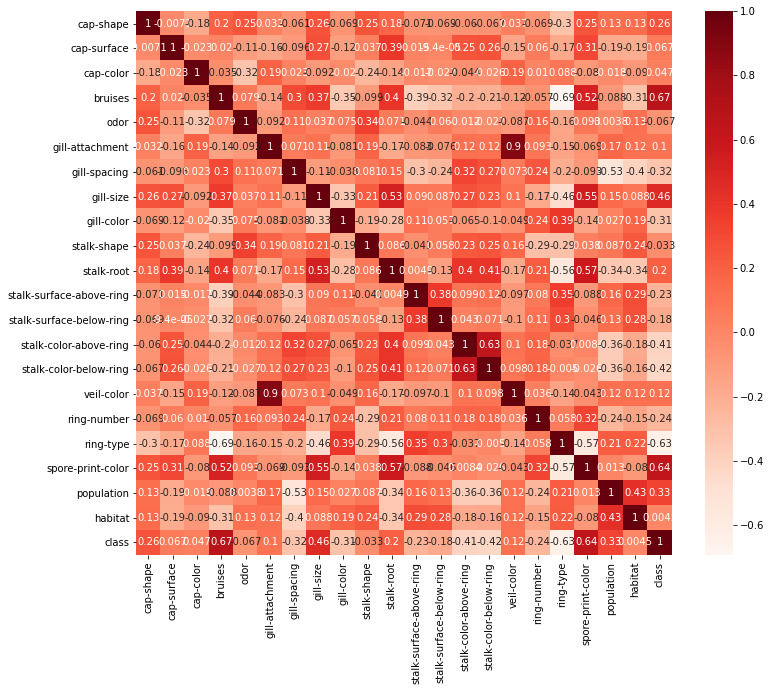

bruises                   0.672781
gill-size                 0.464861
stalk-color-above-ring    0.408828
stalk-color-below-ring    0.423310
ring-type                 0.633846
spore-print-color         0.641687
class                     1.000000
Name: class, dtype: float64
cap-surface                 0.066821
cap-color                   0.046755
odor                        0.067078
gill-attachment             0.101329
stalk-shape                 0.032807
stalk-surface-below-ring    0.181825
veil-color                  0.121650
habitat                     0.004531
Name: class, dtype: float64


In [18]:
##we already showed poisonous mushroom's proportion at the side question I
##now we have to look if there is a correlation between the being poisonous and appearance
##we defined a correlation map at data exploration part. we can use same codes for that too...
plt.figure(figsize=(12,10))
cor = clustered_df.drop('veil-type',axis=1).apply(LabelEncoder().fit_transform).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
corrs = abs(cor["class"])
most_relevant_features = corrs[corrs>0.4]
print(most_relevant_features)
least_relevant_features=corrs[corrs<0.2]
print(least_relevant_features)

no    3160
Name: bruises, dtype: int64


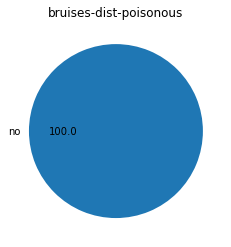

bruises    3376
no         1588
Name: bruises, dtype: int64


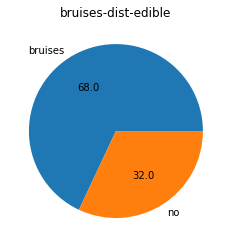

narrow    1828
broad     1332
Name: gill-size, dtype: int64


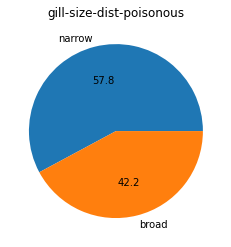

In [19]:
##due to correlation map we can use best matching columns
##these columns are bruises, gill-size, stalk-color-above/below-ring,ring-type,spore-print-color columns. so lets study in these cases
poisonous_subframe=clustered_df[clustered_df['class']=='poisonous']
edible_subframe=clustered_df[clustered_df['class']=='edible']
print(poisonous_subframe['bruises'].value_counts())
labels=['no']
plt.pie(poisonous_subframe['bruises'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("bruises-dist-poisonous")
plt.show()
print(edible_subframe['bruises'].value_counts())
labels=['bruises','no']
plt.pie(edible_subframe['bruises'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("bruises-dist-edible")
plt.show()
print(poisonous_subframe['gill-size'].value_counts())
labels=['narrow','broad']
plt.pie(poisonous_subframe['gill-size'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("gill-size-dist-poisonous")
plt.show()
##we can say bruises and gill-size attributes are not elective

pink        1296
white        956
brown        432
buf          432
cinnamon      36
yellow         8
Name: stalk-color-above-ring, dtype: int64


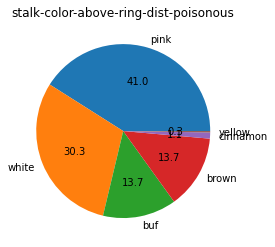

white     3508
gray       576
pink       576
orange     192
red         96
brown       16
Name: stalk-color-above-ring, dtype: int64


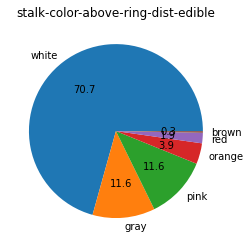

In [20]:
##due to this results we can say most of the pink,brown,cinnamon or yellow colored stalk color above ring mushrooms are poisonous, gray,orange,reds are edible
print(poisonous_subframe['stalk-color-above-ring'].value_counts())
labels=['pink','white','buf','brown','cinnamon','yellow']
plt.pie(poisonous_subframe['stalk-color-above-ring'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("stalk-color-above-ring-dist-poisonous")
plt.show()
print(edible_subframe['stalk-color-above-ring'].value_counts())
labels=['white','gray','pink','orange','red','brown']
plt.pie(edible_subframe['stalk-color-above-ring'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("stalk-color-above-ring-dist-edible")
plt.show()

pink        1296
white        884
brown        488
buf          432
cinnamon      36
yellow        24
Name: stalk-color-below-ring, dtype: int64


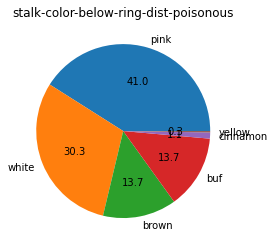

white     3500
gray       576
pink       576
orange     192
red         96
brown       24
Name: stalk-color-below-ring, dtype: int64


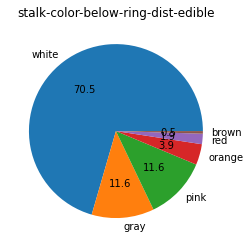

In [21]:
print(poisonous_subframe['stalk-color-below-ring'].value_counts())
labels=['pink','white','brown','buf','cinnamon','yellow']
plt.pie(poisonous_subframe['stalk-color-above-ring'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("stalk-color-below-ring-dist-poisonous")
plt.show()
print(edible_subframe['stalk-color-below-ring'].value_counts())
labels=['white','gray','pink','orange','red','brown']
plt.pie(edible_subframe['stalk-color-below-ring'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("stalk-color-below-ring-dist-edible")
plt.show()
##results are looks like smilar to stalkcolorabovering analysis

evanescent    1808
large         1296
none            36
flaring         20
Name: ring-type, dtype: int64


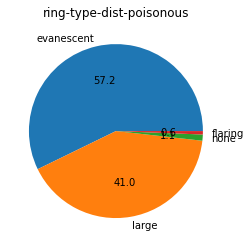

pendant       3968
evanescent     968
flaring         28
Name: ring-type, dtype: int64


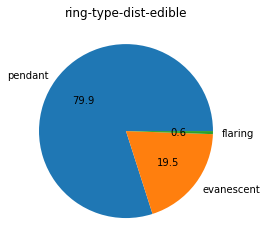

In [22]:
print(poisonous_subframe['ring-type'].value_counts())
labels=['evanescent','large','none','flaring']
plt.pie(poisonous_subframe['ring-type'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("ring-type-dist-poisonous")
plt.show()
print(edible_subframe['ring-type'].value_counts())
labels=['pendant','evanescent','flaring']
plt.pie(edible_subframe['ring-type'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("ring-type-dist-edible")
plt.show()
##we can say non-pendant ring typed mushrooms may be dangerous

white        1844
chocolate    1316
Name: spore-print-color, dtype: int64


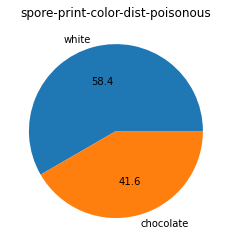

brown        1968
black        1872
white         544
chocolate     316
green          72
buff           48
yellow         48
u              48
orange         48
Name: spore-print-color, dtype: int64


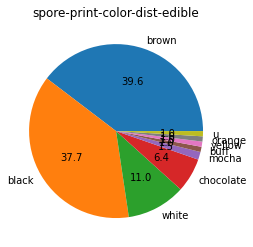

In [23]:
print(poisonous_subframe['spore-print-color'].value_counts())
labels=['white','chocolate']
plt.pie(poisonous_subframe['spore-print-color'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("spore-print-color-dist-poisonous")
plt.show()
print(edible_subframe['spore-print-color'].value_counts())
labels=['brown','black','white','chocolate','mocha','buff','yellow','orange','u']
plt.pie(edible_subframe['spore-print-color'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("spore-print-color-dist-edible")
plt.show()
##this can be mean something.

# Side Question-III
## What is the possibility of being in public places? Can we come across with poisonous mushrooms oftenly?

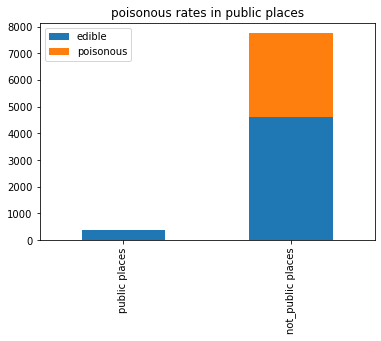

edible    368
Name: class, dtype: int64


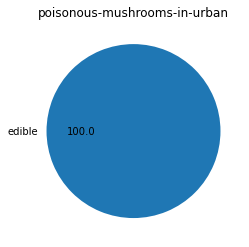

In [24]:

public_places=clustered_df[clustered_df['habitat']=='urban']['class'].value_counts()
#public_places = dfnew[dfnew['habitat']=='urban']['class'].value_counts()
not_public_places = clustered_df[clustered_df['habitat']!='urban']['class'].value_counts()
df2 = pd.DataFrame([public_places,not_public_places])
df2.index=['public places','not_public places']
df2.plot(kind='bar',stacked=True,fig=(18,6),title='habitat')
plt.title("poisonous rates in public places")
plt.show()
urban_subframe=clustered_df[clustered_df['habitat']=='urban']
#urban_subframe=urban_subframe['class']
print(urban_subframe['class'].value_counts())
labels=['edible']
plt.pie(urban_subframe['class'].value_counts(),labels=labels,autopct='%0.1f')
plt.title("poisonous-mushrooms-in-urban")##wnich is none
plt.show()
##according to these results there is no way to come across with poisonous mushrooms in urban but 
#if we consider error percentage there is very very low chance to face poisonous mushrooms in urban 

In [25]:
##for more detail we can use these most correlated attributes one hot encoded versions correlation matrix.
##becouse of the input amounts magnitude, it is not easy to read this kind of correlation map.
##finally we can say there exist some correlations between edibility and appearance in some cases.